<img src=https://www.kiggs-studie.de/fileadmin/templates/kiggs/pix/logo_kiggs.png width="200">

## KiGGS

KiGGS is a long-term study conducted by the Robert Koch Institute (RKI) on the health of children and adolescents in Germany. The study repeatedly supplies data, representative of the country as a whole, on the health of under 18-year-olds. In addition, the children and adolescents of the first KiGGS study are repeatedly invited, and they continue to be monitored right into their adulthood.

More information: https://www.kiggs-studie.de/english/home.html

## Project Setting: 

The project is organized as follows:

*   Form a group of 5 students. Define a group name of your choice.
*   Send 1 mail with your group name and all student IDs to *teaching-lippert@hpi.de* . Please write us a single mail per group.
*   Solve the tasks given at the bottom of this page. Use a Jupyter notebook (e.g. by using Google Colab) for your solutions.
*   The project deadline is at 23:59 CET on Thursday, March 25th.
*   Hand in your notebook no later than the project deadline. Send a single submission per group to *teaching-lippert@hpi.de*

## Presentations: 
*   On Friday, March 26th, you will present your findings from the project work via Zoom. We will assign a time slot for each group.
*   The presentations will be graded.
*   The presentations should include solutions for each task at the bottom of this page.
*   Denote individual tasks (1-17) in your presentation and notebook.
*   You can choose any sensible presentation format. Common choices include Jupyter Notebooks (e.g. with Google Colab) and PowerPoint slides.
*   The presentation duration is 30 min (max.), each group member should be part of the presentation.

We will offer Q&A sessions via Zoom (same link as the lectures) on Tuesday and Thursday 11-12AM, respectively.

#**SOLUTION**

---
##**Data understanding**

---

---
##### **1.** 
Datasets can come in many file types. The KiGGS dataset is stored in a .sav file. What file format is it? Consult your favorite search engine to find a way to read .sav files in Python. Transform the dataset into a Pandas dataframe and present a snippet of the data.(2p)

---

In [ ]:
from google.colab import files # import the file into googlecolab
uploaded = files.upload()


Saving KiGGS03_06.sav to KiGGS03_06.sav


In [ ]:
pip install pyreadstat #install the library needed for reading the SAV file

     |████████████████████████████████| 2.5MB 7.6MB/s 


In [ ]:
import pandas as pd   #reading and saving the file as a dataframe named kiggs
kiggs = pd.read_spss("KiGGS03_06.sav")

In [ ]:
kiggs.head() #check the head of kiggs to check it.

,PIDNR,PPoint,OW,STALA,wKiGGS,wKGSLab,wKGSVitD,sex,sexa,age2,agegrp,AUSL,migrant,mbtyp,efbtyp,kfbtyp,capi,lab,ffq,e001B,e004,e005,e005B1,e005B2,e005B3,e006,e006B1,e006B2,e006B3,e007m,e007ma,e007v,e007va,e008m,e008v,e009m,e009mz,e009v,e009vz,e010m1,...,PHOS,Eisen,Ferritin,Eiweiss,GGT,GLUCX,HbA1c,SAURX,CHOLX,HDLX,LDLX,GLYCX,KALI,KALZ,MAGN,VitD,STFR,VitB12,Homocyst,S_InhSCR,S_DermPt,S_DermFa,S_Katze,S_Pferd,S_Hund,S_Eiklar,S_MEiws,S_WMehl,S_Reis,S_Erdnus,S_Soja,S_Karott,S_Kartof,S_GApfel,S_Liesch,S_Roggen,S_Clados,S_Asperg,S_Birke,S_Beifus
0,1.0,82.0,Ost,Kleinstädtisch,0.787814,0.777576,NaN,Männlich,Jungen,12 - 13 J.,11 - 13 Jahre,Kein Ausländer,Nicht-Migrant,MB11-17,EFB11-13,KFB11-13,Ja,Blut- u. Urinwerte,Ja,(Leibliche) Eltern,Mutter,Einzelkind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja,0,Ja,0,Deutschland,Deutschland,Ja,NaN,Ja,NaN,Ja,...,1.65,14.1,34.59,7.3,12,90.0,4.2,4.51,147.0,56.8,76.0,86.0,4.34,2.60,0.86,NaN,1.83,334.3,10.89,Ja,Nein,Nein,Nein,Ja,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Ja
1,2.0,102.0,Ost,Ländlich,0.237334,0.214002,0.188483,Männlich,Jungen,10 - 11 J.,7 - 10 Jahre,Kein Ausländer,Nicht-Migrant,MB7-10,EFB7-10,Trifft nicht zu,Ja,Blut- u. Urinwerte,Ja,(Leibliche) Eltern,Mutter,Einzelkind,NaN,NaN,NaN,Lebt mit keinen Geschwistern zusammen,NaN,NaN,NaN,Ja,0,0,Ja,Deutschland,Anderes Land,Ja,NaN,Einreisejahr angegeben,1994.0,Ja,...,1.40,17.6,49.56,7.6,15,100.0,5.4,4.53,231.0,76.7,133.0,139.0,4.60,2.67,0.82,45.3,1.52,980.8,7.51,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein
2,3.0,102.0,Ost,Ländlich,0.236580,0.211179,0.201237,Weiblich,Mädchen,8 - 9 J.,7 - 10 Jahre,Kein Ausländer,Nicht-Migrant,MB7-10,EFB7-10,Trifft nicht zu,Ja,Blut- u. Urinwerte,Ja,(Leibliche) Eltern,Mutter,Geschwisterzahl angegeben,Ein Geschwisterkind,Kein Geschwisterkind,Kein Geschwisterkind,Geschwisterzahl angegeben,Ein Geschwisterkind,Kein Geschwisterkind,Kein Geschwisterkind,Ja,0,Ja,0,Deutschland,Deutschland,Ja,NaN,Ja,NaN,Ja,...,1.66,13.8,51.63,8.1,10,94.0,4.4,4.30,164.0,46.7,100.0,97.0,4.18,2.56,0.88,47.3,NaN,731.8,7.12,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein
3,4.0,78.0,Ost,Ländlich,0.363842,0.341644,0.407207,Weiblich,Mädchen,14 - 15 J.,14 - 17 Jahre,Kein Ausländer,Nicht-Migrant,MB11-17,EFB14-17,KFB14-17,Ja,Blut- u. Urinwerte,Ja,Mutter und Partner,Mutter,Geschwisterzahl angegeben,Kein Geschwisterkind,Ein Geschwisterkind,Kein Geschwisterkind,Geschwisterzahl angegeben,Kein Geschwisterkind,Ein Geschwisterkind,Kein Geschwisterkind,Ja,0,Ja,0,Deutschland,Anderes Land,Ja,NaN,Einreisejahr angegeben,1989.0,Ja,...,1.64,12.4,37.52,7.9,10,78.0,3.6,4.45,152.0,76.3,79.0,54.0,4.14,2.50,0.94,21.6,NaN,878.2,5.55,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein
4,5.0,118.0,Ost,Ländlich,0.420490,NaN,NaN,Männlich,Jungen,4 - 5 J.,3 - 6 Jahre,Kein Ausländer,Nicht-Migrant,MB3-6,EFB3-6,Trifft nicht zu,Ja,Nur Urinwerte,Ja,(Leibliche) Eltern,Mutter,Geschwisterzahl angegeben,Ein Geschwisterkind,Kein Geschwisterkind,Kein Geschwisterkind,Geschwisterzahl angegeben,Ein Geschwisterkind,Kein Geschwisterkind,Kein Geschwisterkind,Ja,0,Ja,0,Deutschland,Deutschland,Ja,NaN,Ja,NaN,Ja,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
#####**2.** 
Show descriptive statistics about the overall dataset (e.g., number of instances, number of attributes, attribute types) and demographic statistics about the subjects (e.g., age, gender, region, socioeconomic status, etc.).(5p)

---

In [ ]:
kiggs.shape #size of of dataframe

(17640, 1206)

In [ ]:
kiggs.info() #basic info about our kiggs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Columns: 1206 entries, PIDNR to S_Beifus
dtypes: category(1103), float64(101), object(2)
memory usage: 34.6+ MB


Here we can already see that the dataset is composed of 1206 columns, this is the amount of data that is gathered from each participant in the study. 
We also count with an index of 17640 entries, this means 17640 participants in the study.
In addition, we can see that the data is divided into 3 types:


*   Categorical data = 1103 columns
*   Numerical data (float64) = 101 columns
*   Strings (object) = 2 columns

Here it is important to state, that some of the "categorical" data might be actually numbers, but they were not encoded as float64, they are defined as "metric" in the documentation, but here is dealt with as categories.



To see the demographic data we implement the following code

In [ ]:
kiggs["age2"].value_counts(sort=False)  # to obtain number of people in each year

0 - 1 J.      1860
10 - 11 J.    2076
12 - 13 J.    2018
14 - 15 J.    1972
16 - 17 J.    1764
2 - 3 J.      1879
4 - 5 J.      1935
6 - 7 J.      2032
8 - 9 J.      2104
Name: age2, dtype: int64

In [ ]:
kiggs["agegrp"].value_counts(sort=False)  # Here is similar, but is grouped

0 - 2 Jahre      2805
11 - 13 Jahre    3076
14 - 17 Jahre    3736
3 - 6 Jahre      3875
7 - 10 Jahre     4148
Name: agegrp, dtype: int64

With these age groups, it is easier to see more context on the age of the participants.

*  0 - 2 years: 2805
*  3 - 6 years: 3875
*  7 - 10 years: 4148
*  11 - 13 years: 3076
*  14 - 17 years: 3736

In [ ]:
kiggs["sex"].value_counts(sort=False)  # to obtain the amount women and men

Männlich    8985
Weiblich    8655
Name: sex, dtype: int64

Here we see:
*  Male: 8985
*  Female: 8655

In [ ]:
kiggs["STALA"].value_counts(sort=False)  # we can know how many people come from the countryside, small, medium or big cities

Großstädtisch      4014
Kleinstädtisch     4654
Ländlich           3913
Mittelstädtisch    5059
Name: STALA, dtype: int64

In [ ]:
kiggs["schichtz"].value_counts(sort=False)  # Social status

Hoher Sozialstatus        4423
Mittlerer Sozialstatus    7997
Niedriger Sozialstatus    4794
Name: schichtz, dtype: int64

Finally with this last one we can see the social status divided into 3 categories:
*  High: 4423
*  Medium: 7997
*  Low: 4794

---
#####**3.** 
Select (at least 5) attributes of interest to your particular topic using indexing/slicing. Justify your selection. Show and justify which Python functionalities you used for your selection. Optional: present any other selection criteria you used to define your dataset (e.g., only children aged < 10 years).(5p) When we refer to the dataset below, we are referring to your selected subset of the total data.

---

Here we are interested in exploring the relationship between the age of the participants along with the gender, and the **exercise performed (play outside, practice sports in a club or outside a club)**. We will then see whether this affects the health of the participants. Therefore, we will relate with some metabolic markers like **BMI, triglyceride, and glycated hemoglobin.** This is of interest due to the medical relationship between inactivity and the worsening of the health status of the individuals. The three chosen metabolic markers indicate the risk of having or developing diabetes or cardiovascular diseases.

In [ ]:
new_kiggs = kiggs[["sex","agegrp","e0621","e0622","e0623","bmiB","GLYCX","HbA1c"]] #use indexing with the names of the desired attributes
new_kiggs.head()

,sex,agegrp,e0621,e0622,e0623,bmiB,GLYCX,HbA1c
0,Männlich,11 - 13 Jahre,NaN,NaN,NaN,21.929268,86.0,4.2
1,Männlich,7 - 10 Jahre,Fast jeden Tag,Nie,3-5 mal pro Woche,16.546827,139.0,5.4
2,Weiblich,7 - 10 Jahre,Fast jeden Tag,Nie,Fast jeden Tag,22.564967,97.0,4.4
3,Weiblich,14 - 17 Jahre,NaN,NaN,NaN,20.714774,54.0,3.6
4,Männlich,3 - 6 Jahre,3-5 mal pro Woche,1-2 mal pro Woche,Seltener,15.816788,NaN,NaN


In the previous point we used indexing with the names of the attributes to access the specific columns we are interested in, this is the easiest way to do it due to the hundreds of attributes listed. Once we defined our target attributes we check in the documentation how are these defined and use it to call them and form the new dataframe.

For last, we want to change the names in our dataframe to make it more human-friendly.

In [ ]:
new_kiggs = new_kiggs.rename(columns={"agegrp":"age","e0621":"freq_play_outside","e0622":"freq_sports_in_club","e0623":"freq_sports_out_club","bmiB":"BMI"}) #change the name of some attributes


In [ ]:
new_kiggs.head() # check the table again
new_kiggs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   17640 non-null  category
 1   age                   17640 non-null  category
 2   freq_play_outside     7840 non-null   category
 3   freq_sports_in_club   7698 non-null   category
 4   freq_sports_out_club  7571 non-null   category
 5   BMI                   17493 non-null  float64 
 6   GLYCX                 14249 non-null  category
 7   HbA1c                 14097 non-null  category
dtypes: category(7), float64(1)
memory usage: 303.0 KB


Here we can see, that some data that should be numbers (GLYCX and HbA1c) is treated as categories. We will transform this into float64 in our table.

In [ ]:
new_kiggs["GLYCX"] = new_kiggs["GLYCX"].astype(float) #transform to float
new_kiggs["HbA1c"] = new_kiggs["HbA1c"].astype(float) #transform to float
new_kiggs.info() #check is correctly transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   17640 non-null  category
 1   age                   17640 non-null  category
 2   freq_play_outside     7840 non-null   category
 3   freq_sports_in_club   7698 non-null   category
 4   freq_sports_out_club  7571 non-null   category
 5   BMI                   17493 non-null  float64 
 6   GLYCX                 14249 non-null  float64 
 7   HbA1c                 14097 non-null  float64 
dtypes: category(5), float64(3)
memory usage: 500.6 KB


---
#####**4.** 
Visualize (e.g., by using a pair plot) your dataset and interpret descriptive statistics (e.g., mean, variance, min, max, mode). What Python functionalities did you use?(5p)

---

In [ ]:
import numpy as np #import for plotting
import matplotlib.pyplot as plt
import seaborn as sns

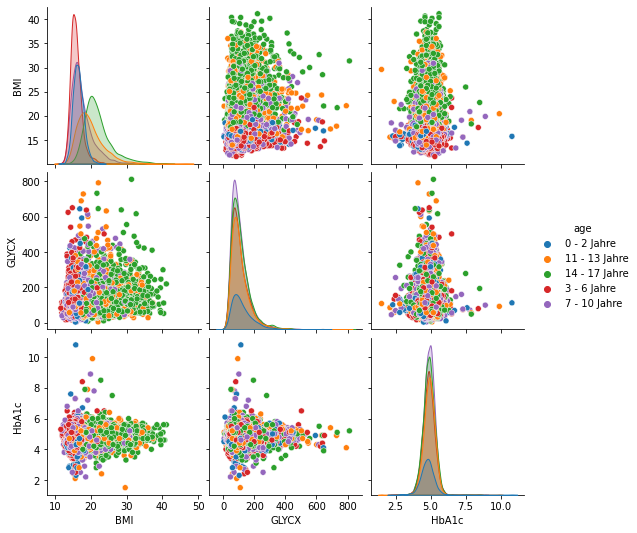

In [ ]:
sns.pairplot(new_kiggs, hue="age") #distribution regarding the age group

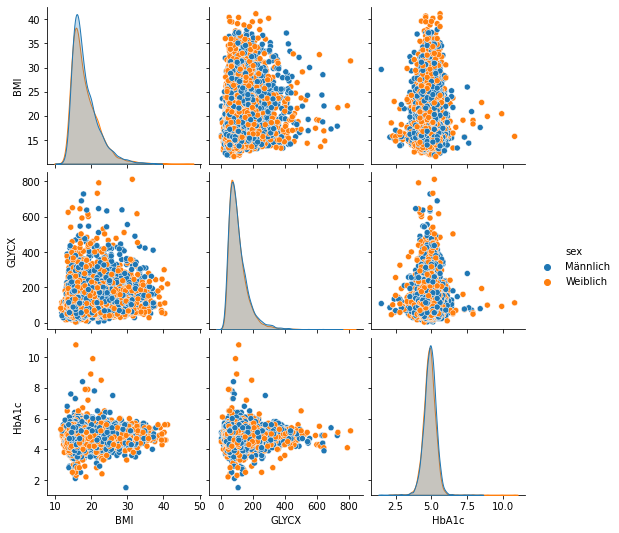

In [ ]:
sns.pairplot(new_kiggs, hue="sex") #distribution of the data regarding the gender

The age and the frequencies of exercise is also categorical, but this could be representated with numbers in order to produce a plot. For this example we will consider:
*  Fast jeden Tag = 1
*  3-5 mal pro Woche = 2
*  1-2 mal pro Woche = 3
*  Seltener = 4
*  Nie = 5

In [ ]:
new_kiggs_plot = new_kiggs.copy() #we don't want to alter our original dataframe


In [ ]:
new_kiggs_plot["freq_play_outside"] = new_kiggs_plot["freq_play_outside"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
new_kiggs_plot["freq_sports_in_club"] = new_kiggs_plot["freq_sports_in_club"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
new_kiggs_plot["freq_sports_out_club"] = new_kiggs_plot["freq_sports_out_club"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
# with these we change our categorical variables to numericals to create a more extensive plot representation

In [ ]:
new_kiggs_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   17640 non-null  category
 1   age                   17640 non-null  category
 2   freq_play_outside     7840 non-null   float64 
 3   freq_sports_in_club   7698 non-null   float64 
 4   freq_sports_out_club  7571 non-null   float64 
 5   BMI                   17493 non-null  float64 
 6   GLYCX                 14249 non-null  float64 
 7   HbA1c                 14097 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 861.7 KB


With this new dataframe we can create a more extensive plot

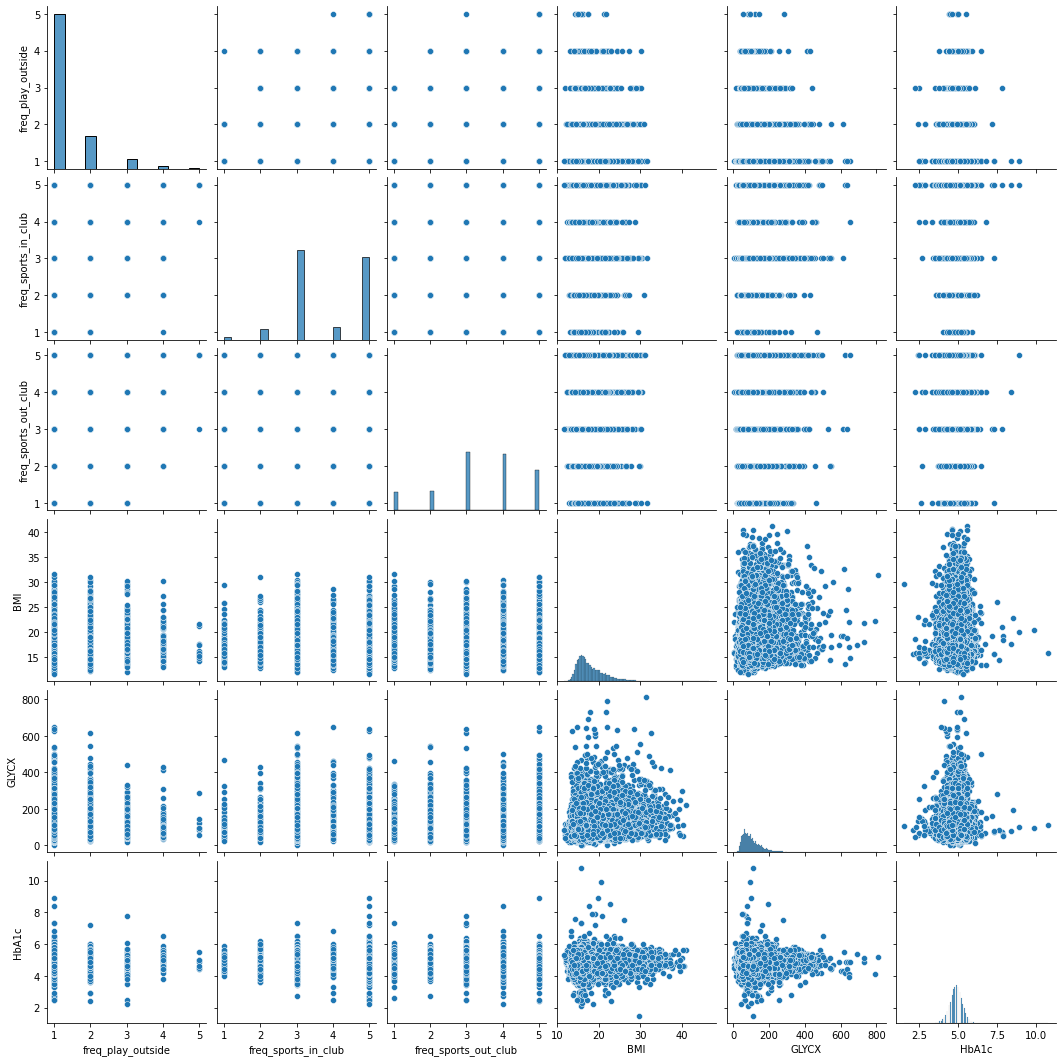

In [ ]:
sns.pairplot(new_kiggs_plot)

We will use our 

```
new_kiggs
```
dataset for the rest of the code.


In [ ]:
from scipy import stats # import for statistics
from scipy.stats import kstest
import statistics
import scipy

In [ ]:
new_kiggs.describe() #obtain data from the numeric values

,BMI,GLYCX,HbA1c
count,17493.000000,14249.000000,14097.000000
mean,18.256129,108.931293,4.861261
std,3.724888,64.579568,0.428726
min,11.587203,4.000000,1.500000
25%,15.631200,67.000000,4.600000
50%,17.234651,93.000000,4.900000
75%,20.033033,132.000000,5.100000
max,46.494961,812.000000,10.800000


In the previous code it is possible to visualize the 3 numerical attributes of our dataset. Here we see how many patients have registered these data (count), the mean, standard deviation, min, max and IQ values. 

We can find the variance with

In [ ]:
new_kiggs.var() #obtain the variance

BMI        13.874791
GLYCX    4170.520616
HbA1c       0.183806
dtype: float64

In [ ]:
new_kiggs.median(skipna=True) #obtain the median

BMI      17.234651
GLYCX    93.000000
HbA1c     4.900000
dtype: float64

Here we can see the code to obtain the median values of our dataset, it is important to remember the presence of NaN values, therefore we make the skipna argument TRUE to avoid them in the sorting procedure.

In [ ]:
new_kiggs.mode() # obtain the mode(frequent values).

,sex,age,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
0,Männlich,7 - 10 Jahre,Fast jeden Tag,1-2 mal pro Woche,1-2 mal pro Woche,15.721574,69.0,4.9


This function allow us to see the most frequent value in all the attributes of our dataset, therefore we can see that there are more males than females (as seen in the first points), 7-10 years is the most frequent age group. For the sports frequencies playing outside is done almost every day, and sports in/outside a club is between 1-2 per week. BMI value is between the 5th and 85th percentage (meaning healty kids). This also applies to triglyceride and HbA1c.

Below we can see another way of obtaining the mode with ScyPy, where we not only see the most frequent values, but also the number of times it was registered.

In [ ]:
stats.mode(new_kiggs) #obtain the mode

ModeResult(mode=array([['Männlich', '7 - 10 Jahre', 'Fast jeden Tag',
        '1-2 mal pro Woche', '1-2 mal pro Woche', 15.72157429667507,
        69.0, 4.9]], dtype=object), count=array([[8985, 4148, 6050, 3494, 2301,    8,  175, 1501]]))

We could go further and also find the skewness of our dataset.

In [ ]:
new_kiggs.skew(skipna=True)

BMI      1.557781
GLYCX    2.474495
HbA1c    0.235572
dtype: float64

Here is it worth to remember the mean, median and mode for this 3 attributes.
*  BMI: 18.256, 17.234, 15.721
*  GLYCX: 108.931, 93, 69
*  HbA1c: 4.861, 4.9, 4.9

Associated with the values of skewness, we can see why BMI and GLYCS tend to have positive skewness whereas HbA1c is more normally distributed and the median values confirm  these assumptions.

---
##**Preprocessing & Statistics**

---

---
#####**5.** 
Perform a correlation analysis for two selected attributes by means of a visualization and a calculated correlation coefficient. Explain your results.(3p)

---

The main question we want to address in this exercise is:

*  Do kids who exercise less frequently are overweight?

with this we can establish

*  H0: kids who exercise less frequently are not overweight.
*  H1: kids who exercise less frequently are overweight.

For this we will use the categorical variables of exercise and the numerical of BMI

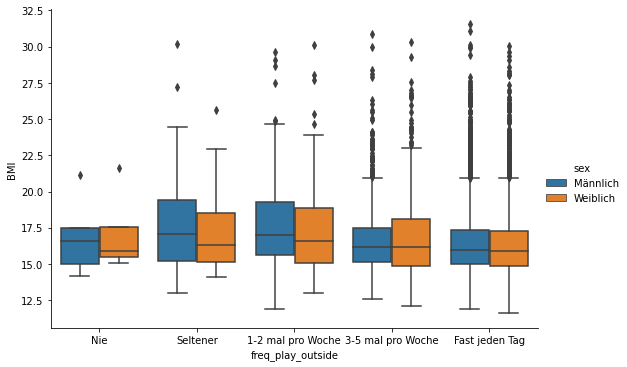

In [ ]:
sns.catplot(data=new_kiggs, kind="box", x="freq_play_outside", y="BMI", order= ["Nie", "Seltener", "1-2 mal pro Woche","3-5 mal pro Woche","Fast jeden Tag"], hue="sex", aspect=12/8)

Graphically it is hard to identify difference among the groups, the media tend to overlap over the box of the other categories. But we do see an important amount of outliers.

Due to the variance of BMI regarding each age group we decided to split our data accordingly to age group and establish a distinct BMI threshold for each group.

In [ ]:
# we create the group for people between 0-2 years and see our data

age_very_small = new_kiggs[new_kiggs["age"] == "0 - 2 Jahre"]
age_very_small = age_very_small.drop(["age"], axis=1) # we drop the age column, it is no longer necesary here.
print(age_very_small.info())
print(age_very_small.describe())
age_very_small.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 5 to 17629
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   2805 non-null   category
 1   freq_play_outside     0 non-null      category
 2   freq_sports_in_club   0 non-null      category
 3   freq_sports_out_club  0 non-null      category
 4   BMI                   2747 non-null   float64 
 5   GLYCX                 1111 non-null   float64 
 6   HbA1c                 998 non-null    float64 
dtypes: category(4), float64(3)
memory usage: 99.3 KB
None
               BMI        GLYCX       HbA1c
count  2747.000000  1111.000000  998.000000
mean     16.450167   120.387039    4.750802
std       1.459951    69.277439    0.519349
min      11.757592     4.000000    2.300000
25%      15.422735    71.500000    4.500000
50%      16.351154   103.000000    4.800000
75%      17.383142   150.000000    5.000000
max      23.27

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
5,Weiblich,NaN,NaN,NaN,16.617969,NaN,NaN
6,Männlich,NaN,NaN,NaN,17.012152,NaN,NaN
12,Männlich,NaN,NaN,NaN,17.268446,72.0,4.0
16,Weiblich,NaN,NaN,NaN,17.758124,65.0,NaN
17,Männlich,NaN,NaN,NaN,16.943389,81.0,5.0


In [ ]:
# we create the group for people between 3-6 years and see our data

age_small = new_kiggs[new_kiggs["age"] == "3 - 6 Jahre"]
age_small = age_small.drop(["age"], axis=1) # we drop the age column, it is no longer necesary here.
print(age_small.info())
print(age_small.describe())
age_small.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3875 entries, 4 to 17639
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   3875 non-null   category
 1   freq_play_outside     3774 non-null   category
 2   freq_sports_in_club   3709 non-null   category
 3   freq_sports_out_club  3677 non-null   category
 4   BMI                   3836 non-null   float64 
 5   GLYCX                 3033 non-null   float64 
 6   HbA1c                 3024 non-null   float64 
dtypes: category(4), float64(3)
memory usage: 136.9 KB
None
               BMI        GLYCX        HbA1c
count  3836.000000  3033.000000  3024.000000
mean     15.805033   106.362677     4.844378
std       1.636668    62.433825     0.424819
min      11.587203    17.000000     2.400000
25%      14.735829    65.000000     4.600000
50%      15.576624    90.000000     4.900000
75%      16.564735   130.000000     5.100000
max  

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
4,Männlich,3-5 mal pro Woche,1-2 mal pro Woche,Seltener,15.816788,NaN,NaN
7,Weiblich,Fast jeden Tag,1-2 mal pro Woche,1-2 mal pro Woche,15.327368,95.0,5.0
8,Weiblich,1-2 mal pro Woche,Nie,Nie,19.052470,NaN,NaN
13,Männlich,Fast jeden Tag,Nie,Seltener,14.965758,86.0,5.5
21,Weiblich,Fast jeden Tag,Nie,Seltener,17.342697,92.0,5.1


In [ ]:
# we create the group for people between 7-10 years and see our data

age_medium = new_kiggs[new_kiggs["age"] == "7 - 10 Jahre"]
age_medium = age_medium.drop(["age"], axis=1) # we drop the age column, it is no longer necesary here.
print(age_medium.info())
print(age_medium.describe())
age_medium.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 1 to 17637
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   4148 non-null   category
 1   freq_play_outside     4066 non-null   category
 2   freq_sports_in_club   3989 non-null   category
 3   freq_sports_out_club  3894 non-null   category
 4   BMI                   4131 non-null   float64 
 5   GLYCX                 3714 non-null   float64 
 6   HbA1c                 3702 non-null   float64 
dtypes: category(4), float64(3)
memory usage: 146.5 KB
None
               BMI        GLYCX       HbA1c
count  4131.000000  3714.000000  3702.00000
mean     17.345578   105.730749     4.87939
std       2.925066    60.859237     0.41585
min      11.911245     5.000000     2.20000
25%      15.341945    66.000000     4.60000
50%      16.607692    91.000000     4.90000
75%      18.661540   128.000000     5.10000
max      31.5

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
1,Männlich,Fast jeden Tag,Nie,3-5 mal pro Woche,16.546827,139.0,5.4
2,Weiblich,Fast jeden Tag,Nie,Fast jeden Tag,22.564967,97.0,4.4
11,Weiblich,Fast jeden Tag,1-2 mal pro Woche,Fast jeden Tag,16.040746,128.0,5.3
14,Weiblich,3-5 mal pro Woche,Nie,Seltener,18.888724,107.0,5.9
15,Weiblich,Fast jeden Tag,Nie,3-5 mal pro Woche,17.071653,79.0,4.4


In [ ]:
# we create the group for people between 11-13 years and see our data

age_big = new_kiggs[new_kiggs["age"] == "11 - 13 Jahre"]
age_big = age_big.drop(["age"], axis=1) # we drop the age column, it is no longer necesary here.
print(age_big.info())
print(age_big.describe())
age_big.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 0 to 17636
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   3076 non-null   category
 1   freq_play_outside     0 non-null      category
 2   freq_sports_in_club   0 non-null      category
 3   freq_sports_out_club  0 non-null      category
 4   BMI                   3064 non-null   float64 
 5   GLYCX                 2877 non-null   float64 
 6   HbA1c                 2874 non-null   float64 
dtypes: category(4), float64(3)
memory usage: 108.8 KB
None
               BMI        GLYCX        HbA1c
count  3064.000000  2877.000000  2874.000000
mean     19.769284   108.959333     4.889979
std       3.739489    66.374617     0.418029
min      11.939548     5.000000     1.500000
25%      17.130553    68.000000     4.600000
50%      19.034070    93.000000     4.900000
75%      21.592179   130.000000     5.200000
max  

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
0,Männlich,NaN,NaN,NaN,21.929268,86.0,4.2
9,Männlich,NaN,NaN,NaN,17.519877,95.0,4.5
10,Weiblich,NaN,NaN,NaN,26.578037,59.0,5.2
32,Weiblich,NaN,NaN,NaN,15.932347,49.0,4.4
34,Weiblich,NaN,NaN,NaN,27.111906,330.0,5.7


In [ ]:
# we create the group for people between 14-17 years and see our data

age_very_big = new_kiggs[new_kiggs["age"] == "14 - 17 Jahre"]
age_very_big = age_very_big.drop(["age"], axis=1) # we drop the age column, it is no longer necesary here.
print(age_very_big.info())
print(age_very_big.describe())
age_very_big.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3736 entries, 3 to 17638
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sex                   3736 non-null   category
 1   freq_play_outside     0 non-null      category
 2   freq_sports_in_club   0 non-null      category
 3   freq_sports_out_club  0 non-null      category
 4   BMI                   3715 non-null   float64 
 5   GLYCX                 3514 non-null   float64 
 6   HbA1c                 3499 non-null   float64 
dtypes: category(4), float64(3)
memory usage: 132.0 KB
None
               BMI        GLYCX       HbA1c
count  3715.000000  3514.000000  3499.00000
mean     21.886965   110.886170     4.86459
std       3.916974    66.713877     0.42023
min      13.975725     9.000000     2.80000
25%      19.325410    67.250000     4.60000
50%      21.072838    94.000000     4.90000
75%      23.468051   135.000000     5.10000
max      41.1

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
3,Weiblich,NaN,NaN,NaN,20.714774,54.0,3.6
46,Weiblich,NaN,NaN,NaN,NaN,77.0,5.5
49,Weiblich,NaN,NaN,NaN,19.199288,93.0,5.2
50,Männlich,NaN,NaN,NaN,22.764156,64.0,5.2
87,Weiblich,NaN,NaN,NaN,23.433928,169.0,5.1


At this point, we already realized that for 3 of our 5 subgroups the frequency of doing sports was not recorded, without the independent variable, we need to drop completely these groups and keep working only with "3 - 6 years" and "7 - 10 years".

We will create a new variable that is called bmi_binorm which is defined by having a BMI higher than the 85% of the population or not. 

We put the cut in **17** for the kids between [3 - 6 years] and **19** for the kids between [7 - 10 years] old.

This number comes from a estimation made by the CDC about kids weight, the information can be found here: https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html

In [ ]:
def bmi_binorm1(row):
  if row["BMI"] >= 17:
    return 1
  elif row["BMI"] < 17:
    return 0
  return np.nan
age_small["bmi_binorm"]=age_small.apply(bmi_binorm1, axis = 1)
age_small.head()

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c,bmi_binorm
4,Männlich,3-5 mal pro Woche,1-2 mal pro Woche,Seltener,15.816788,NaN,NaN,0.0
7,Weiblich,Fast jeden Tag,1-2 mal pro Woche,1-2 mal pro Woche,15.327368,95.0,5.0,0.0
8,Weiblich,1-2 mal pro Woche,Nie,Nie,19.052470,NaN,NaN,1.0
13,Männlich,Fast jeden Tag,Nie,Seltener,14.965758,86.0,5.5,0.0
21,Weiblich,Fast jeden Tag,Nie,Seltener,17.342697,92.0,5.1,1.0


and

In [ ]:
def bmi_binorm2(row):
  if row["BMI"] >= 19:
    return 1
  elif row["BMI"] < 19:
    return 0
  return np.nan
age_medium["bmi_binorm"]=age_medium.apply(bmi_binorm2, axis = 1)
age_medium.head()

,sex,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c,bmi_binorm
1,Männlich,Fast jeden Tag,Nie,3-5 mal pro Woche,16.546827,139.0,5.4,0.0
2,Weiblich,Fast jeden Tag,Nie,Fast jeden Tag,22.564967,97.0,4.4,1.0
11,Weiblich,Fast jeden Tag,1-2 mal pro Woche,Fast jeden Tag,16.040746,128.0,5.3,0.0
14,Weiblich,3-5 mal pro Woche,Nie,Seltener,18.888724,107.0,5.9,0.0
15,Weiblich,Fast jeden Tag,Nie,3-5 mal pro Woche,17.071653,79.0,4.4,0.0


With these data modifications and clarifications we can proceed to make a Chi-Square statistics to correlate the frequency of playing outside to being overweight, or not.

We create then our contingency tables for both datasets

In [ ]:
contingency1 = pd.crosstab(age_small.freq_play_outside[~age_small.freq_play_outside.isna()], age_small.bmi_binorm[~age_small.bmi_binorm.isna()])
print(contingency1)

bmi_binorm          0.0  1.0
freq_play_outside           
1-2 mal pro Woche    68   26
3-5 mal pro Woche   376   99
Fast jeden Tag     2615  520
Nie                   4    3
Seltener             20    6


In [ ]:
contingency2 = pd.crosstab(age_medium.freq_play_outside[~age_medium.freq_play_outside.isna()], age_medium.bmi_binorm[~age_medium.bmi_binorm.isna()])
print(contingency2)

bmi_binorm          0.0  1.0
freq_play_outside           
1-2 mal pro Woche   193   86
3-5 mal pro Woche   622  189
Fast jeden Tag     2287  594
Nie                   2    1
Seltener             50   26


now we do the correlation test

In [ ]:
#perform the correlation test
from scipy.stats import chi2_contingency 
stat, p, dof, expected = chi2_contingency(contingency1)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.0031807891556015757
Dependent (reject H0)


In [ ]:
#perform the correlation test
stat, p, dof, expected = chi2_contingency(contingency2)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.00010678485527965985
Dependent (reject H0)


In both cases we reject the null hypothesis. Then we can assume there is a correlation between doing less exercise and having a higher BMI.

---
##### **6.** 
How did you deal with missing data? Explain. How many subjects would remain if you were to delete all rows with at least one missing value?(5p)

----

While working with Pandas library, this one already deals with the majority of NaN values by default, this facilitates the calculations in the descriptive statistics.

However, as shown in the previous point, we realize that 3 of our 5 subgroups have only missing values for our independent variables, as stated before we drop completely these groups in order to only work with significant data for us.

In [ ]:
new_kiggs.dropna() # with this argument we can see how will our original data look like deleting all the rows with at least one NaN value

,sex,age,freq_play_outside,freq_sports_in_club,freq_sports_out_club,BMI,GLYCX,HbA1c
1,Männlich,7 - 10 Jahre,Fast jeden Tag,Nie,3-5 mal pro Woche,16.546827,139.0,5.4
2,Weiblich,7 - 10 Jahre,Fast jeden Tag,Nie,Fast jeden Tag,22.564967,97.0,4.4
7,Weiblich,3 - 6 Jahre,Fast jeden Tag,1-2 mal pro Woche,1-2 mal pro Woche,15.327368,95.0,5.0
11,Weiblich,7 - 10 Jahre,Fast jeden Tag,1-2 mal pro Woche,Fast jeden Tag,16.040746,128.0,5.3
13,Männlich,3 - 6 Jahre,Fast jeden Tag,Nie,Seltener,14.965758,86.0,5.5
...,...,...,...,...,...,...,...,...
17615,Weiblich,3 - 6 Jahre,Fast jeden Tag,Nie,3-5 mal pro Woche,14.895079,95.0,5.1
17627,Männlich,3 - 6 Jahre,Fast jeden Tag,Nie,1-2 mal pro Woche,13.778128,115.0,5.6
17631,Männlich,7 - 10 Jahre,Fast jeden Tag,1-2 mal pro Woche,Fast jeden Tag,15.000955,89.0,5.4
17632,Männlich,7 - 10 Jahre,Fast jeden Tag,1-2 mal pro Woche,Seltener,21.604938,114.0,4.6


We will have only 6211 subjects from the total

---
##### **7.** 
Plot the distributions (i.e. a histogram) of 5 attributes in your data. Are the individual distributions symmetric or asymmetric?(3p)

---

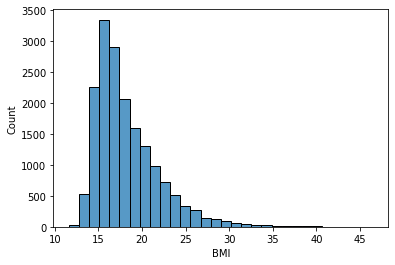

In [ ]:
sns.histplot(new_kiggs_plot["BMI"], bins=30) #asymmetric

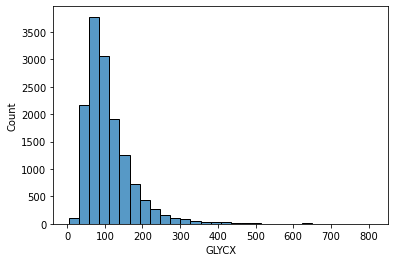

In [ ]:
sns.histplot(new_kiggs_plot["GLYCX"], bins=30) #asymmetric

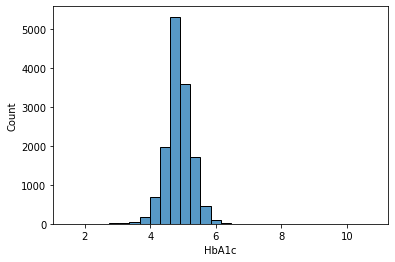

In [ ]:
sns.histplot(new_kiggs_plot["HbA1c"], bins=30) # possible symmetric

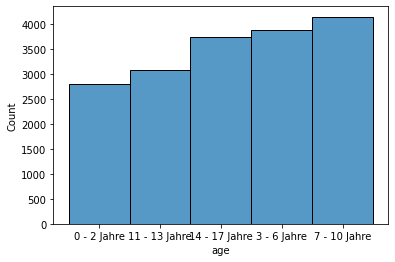

In [ ]:
sns.histplot(new_kiggs_plot["age"], bins=30) #asymmetric

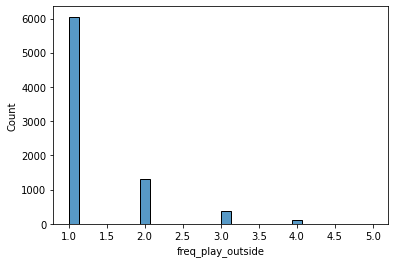

In [ ]:
sns.histplot(new_kiggs_plot["freq_play_outside"], bins=30) #asymmetric

---
##### **8.** 
Choose an attribute of your choice from your dataset. What is the most likely distribution of this attribute? Which statistical test did you use and why?(3p)

---

For this exercise, we will choose glycated hemoglobin. It appears to have a normal distribution, therefore we will test this.

For it, the easiest is with Shaphiro-Wilk test, however, this one has limited performance in large datasets. We will also compare it to the Kolmogorov-Smirnov test.

In [ ]:
print('HbA1c: ', scipy.stats.shapiro(new_kiggs.HbA1c[~new_kiggs.HbA1c.isna()])) #Shaphiro-Wilk

HbA1c:  (0.9591684341430664, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#perform Kolmogorov-Smirnov test
ktest_res = kstest(new_kiggs.HbA1c[~new_kiggs.HbA1c.isna()], 'norm')
print(ktest_res)

KstestResult(statistic=0.9976012747297167, pvalue=0.0)


for both test we reject the null hypothesis, therefore our data is not normally distributed.

---
##### **9.** 
Is there a significant difference between genders or age groups for an attribute of your choice? Which statistical test did you use and why?(3p)

---

We will compare if there is a significant difference between the genders in being overweight in our subset of children between 3 - 6 years.

For this, the better way is to realize a Chi-squared test. This works better due to the categorical nature of our variables

In [ ]:
contingency3 = pd.crosstab(age_medium.sex[~age_medium.sex.isna()], age_medium.bmi_binorm[~age_medium.bmi_binorm.isna()])
print(contingency3) # we start crearing our contingency table

bmi_binorm   0.0  1.0
sex                  
Männlich    1647  472
Weiblich    1572  440


and then we realize our test.

In [ ]:
#perform the correlation test
stat, p, dof, expected = chi2_contingency(contingency3)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.7819012022209002
Independent (H0 holds true)


With this we can assume, that there is no relationship between the gender of the kids and being overweight.
In other words there are not significance difference between the appearance of overweight between boys and girls.

---
##### **10.** 
Show the quantiles of a selected attribute and how they differ by gender or age groups. Explain your observations.(3p)

---

In [ ]:
age_small.groupby("sex").BMI.quantile([0.25,0.5,0.75])

sex           
Männlich  0.25    14.799484
          0.50    15.605431
          0.75    16.549547
Weiblich  0.25    14.668019
          0.50    15.551904
          0.75    16.566029
Name: BMI, dtype: float64

We can see similar distributions of the BMI in both genders. This point makes sense taking into consideration that in the previous point we saw that the gender does not play a relationship with the appearance of overweight individuals.

We can still see some interesting points. The first and second quantile the values are slightly higher for boys than girls, whereas the third quantile the female value is minimaly slightly higher.

---
## **Machine Learning**

---

---

*As stated in the previous sections, for this exercise we will use the data from the "3-6 years" and "7-10 years" subsets.*
*We will make additional transformation for our data for the ML predictions down*

---




***3 - 6 years group***

In [ ]:
age_small["freq_play_outside"] = age_small["freq_play_outside"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
age_small["freq_sports_in_club"] = age_small["freq_sports_in_club"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
age_small["freq_sports_out_club"] = age_small["freq_sports_out_club"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
age_small["freq_play_outside"] = pd.to_numeric(age_small["freq_play_outside"])
age_small["freq_sports_in_club"] = pd.to_numeric(age_small["freq_sports_in_club"])
age_small["freq_sports_out_club"] = pd.to_numeric(age_small["freq_sports_out_club"])
model_me1 = age_small[["freq_play_outside","freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c", "bmi_binorm"]]
model_me1 #visualize our working data for the population between 3-6 years

,freq_play_outside,freq_sports_in_club,freq_sports_out_club,GLYCX,HbA1c,bmi_binorm
4,2.0,3.0,4.0,NaN,NaN,0.0
7,1.0,3.0,3.0,95.0,5.0,0.0
8,3.0,5.0,5.0,NaN,NaN,1.0
13,1.0,5.0,4.0,86.0,5.5,0.0
21,1.0,5.0,4.0,92.0,5.1,1.0
...,...,...,...,...,...,...
17615,1.0,5.0,2.0,95.0,5.1,0.0
17627,1.0,5.0,3.0,115.0,5.6,0.0
17633,2.0,5.0,4.0,NaN,NaN,0.0
17635,1.0,5.0,3.0,231.0,5.1,0.0


In [ ]:
model_me1_clean = model_me1.dropna()
model_me1_clean # and we eliminate our NaNs

,freq_play_outside,freq_sports_in_club,freq_sports_out_club,GLYCX,HbA1c,bmi_binorm
7,1.0,3.0,3.0,95.0,5.0,0.0
13,1.0,5.0,4.0,86.0,5.5,0.0
21,1.0,5.0,4.0,92.0,5.1,1.0
22,2.0,2.0,5.0,114.0,4.6,0.0
28,1.0,5.0,4.0,119.0,5.1,0.0
...,...,...,...,...,...,...
17601,1.0,3.0,4.0,134.0,5.3,0.0
17613,1.0,3.0,3.0,84.0,4.6,1.0
17615,1.0,5.0,2.0,95.0,5.1,0.0
17627,1.0,5.0,3.0,115.0,5.6,0.0


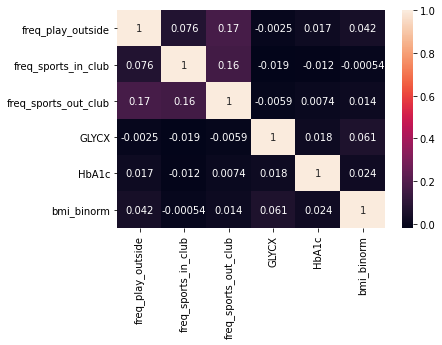

In [ ]:
sns.heatmap(model_me1_clean.corr(), annot=True)

***7 - 10 years group***

In [ ]:
age_medium["freq_play_outside"] = age_medium["freq_play_outside"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
age_medium["freq_sports_in_club"] = age_medium["freq_sports_in_club"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
age_medium["freq_sports_out_club"] = age_medium["freq_sports_out_club"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
age_medium["freq_play_outside"] = pd.to_numeric(age_medium["freq_play_outside"])
age_medium["freq_sports_in_club"] = pd.to_numeric(age_medium["freq_sports_in_club"])
age_medium["freq_sports_out_club"] = pd.to_numeric(age_medium["freq_sports_out_club"])
model_me = age_medium[["freq_play_outside","freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c", "bmi_binorm"]]
model_me #visualize our working data for the population between 7 - 10 years

,freq_play_outside,freq_sports_in_club,freq_sports_out_club,GLYCX,HbA1c,bmi_binorm
1,1.0,5.0,2.0,139.0,5.4,0.0
2,1.0,5.0,1.0,97.0,4.4,1.0
11,1.0,3.0,1.0,128.0,5.3,0.0
14,2.0,5.0,4.0,107.0,5.9,0.0
15,1.0,5.0,2.0,79.0,4.4,0.0
...,...,...,...,...,...,...
17622,1.0,5.0,5.0,NaN,NaN,1.0
17628,1.0,3.0,1.0,NaN,NaN,1.0
17631,1.0,3.0,1.0,89.0,5.4,0.0
17632,1.0,3.0,4.0,114.0,4.6,1.0


In [ ]:
model_me_clean = model_me.dropna()
model_me_clean # and we eliminate our NaNs

,freq_play_outside,freq_sports_in_club,freq_sports_out_club,GLYCX,HbA1c,bmi_binorm
1,1.0,5.0,2.0,139.0,5.4,0.0
2,1.0,5.0,1.0,97.0,4.4,1.0
11,1.0,3.0,1.0,128.0,5.3,0.0
14,2.0,5.0,4.0,107.0,5.9,0.0
15,1.0,5.0,2.0,79.0,4.4,0.0
...,...,...,...,...,...,...
17606,1.0,3.0,1.0,95.0,4.5,0.0
17607,1.0,5.0,3.0,57.0,5.2,1.0
17612,1.0,1.0,1.0,75.0,5.2,0.0
17631,1.0,3.0,1.0,89.0,5.4,0.0


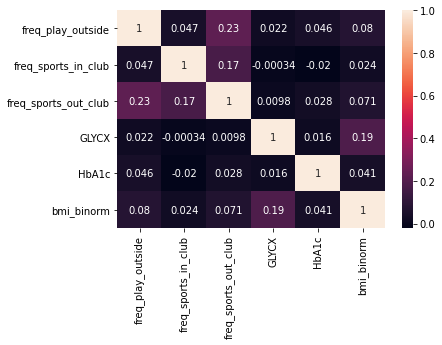

In [ ]:
sns.heatmap(model_me_clean.corr(), annot=True) 

---
#####**11.** 
Split your dataset into a training set and a validation set. Explain your approach.(2p)

---


***3 - 6 years group***

Our dataset is split in a 70/30 way i.e. 70% of the data is the training data while the remaining 30% is reserved as the test data. Our approach to doing is straight forward as the `sklearn.model_selection` package has a function `train_test_split` that comes with the params `test_size` and or `train_size` that enables us specify this. We only made use of the `test_size` param to specify our split ration.

Since we are working across two groups, we perfomed this splitting across both groups

In [ ]:
y1 = model_me1_clean["bmi_binorm"]
x1 = model_me1_clean.drop('bmi_binorm', axis=1)

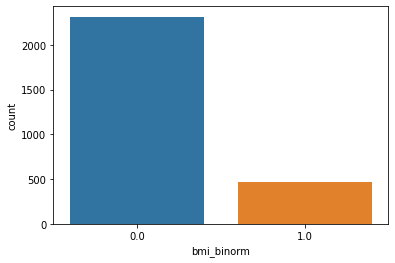

In [ ]:
sns.countplot(data = model_me1_clean, x="bmi_binorm") 

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=12)
x1_train.head()

,freq_play_outside,freq_sports_in_club,freq_sports_out_club,GLYCX,HbA1c
9831,1.0,4.0,5.0,70.0,4.7
1554,1.0,5.0,5.0,180.0,5.0
3960,2.0,3.0,5.0,77.0,5.1
6048,1.0,3.0,3.0,220.0,4.3
5908,1.0,5.0,5.0,113.0,4.6


In [ ]:
print("Size x1_train: ", x1_train.shape)
print("Size x1_test: ", x1_test.shape)

Size x1_train:  (1947, 5)
Size x1_test:  (835, 5)


---
***7 - 10 years group***

In [ ]:
y = model_me_clean["bmi_binorm"]
x = model_me_clean.drop('bmi_binorm', axis=1)


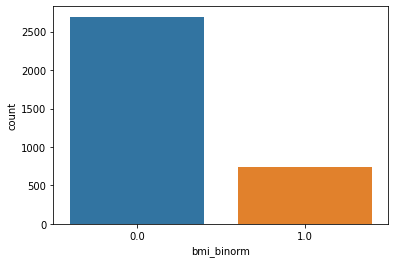

In [ ]:
sns.countplot(data = model_me_clean, x="bmi_binorm")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
x_train.head()

,freq_play_outside,freq_sports_in_club,freq_sports_out_club,GLYCX,HbA1c
10244,1.0,3.0,3.0,316.0,4.6
1208,1.0,2.0,2.0,168.0,5.0
10023,2.0,3.0,4.0,135.0,5.0
2525,1.0,2.0,1.0,132.0,5.5
3994,2.0,5.0,3.0,80.0,4.8


In [ ]:
print("Size x_train: ", x_train.shape)
print("Size x_test: ", x_test.shape)

Size x_train:  (2400, 5)
Size x_test:  (1029, 5)


---
#####**12.** 
Define a target to predict from the attributes you selected. Explain your decision.(2p)

---

Our target in both datasets (groups) is the variable `bmi_binorm`. Picking this variable as our target was straight forward as our quest in this research is to investigate the effect of excersing on obesity in kids. We defined obesity using bmi of the kids and to ensure we classify the kids into either normal or obesity, we converted the bmi measurement of the kids to a binomial that cuts off at bmi ***17*** for age group `3-6years` and ***19*** for age group `7-10 years`




---
##### **13.** 
Build either a logistic or linear regression model, plot the confusion matrix, and interpret the results. Which attributes best predict your defined target?(5p)

---

*As seen in the previous plots our data has an imbalanced distribution. We'll use a weighted logistics regression to solve this. But first lets look at what using our logreg model directly on imbalanced dataset will give us and this will show to us what [accuracy paradox](https://towardsdatascience.com/accuracy-paradox-897a69e2dd9b)* looks like real time 


***3 - 6 years group***

In [ ]:
from sklearn.linear_model import LogisticRegression  #import all the packages necesaries for our model
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve 

In [ ]:
w1 = {0.0: 148, 1.0: 687}

all_train1 = x1_train[["freq_play_outside", "freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c"]].values.reshape(-1,5)
logreg_all_1 = LogisticRegression(random_state=12, class_weight=None)
logreg_all_1.fit(all_train1, y1_train)
all_test1 = x1_test[["freq_play_outside", "freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c"]].values.reshape(-1,5)
logreg_all_pred1 = logreg_all_1.predict(all_test1)

In [ ]:
# performance
print(f'Accuracy Score: {accuracy_score(y1_test,logreg_all_pred1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y1_test, logreg_all_pred1)}')
print(f'Area Under Curve: {roc_auc_score(y1_test, logreg_all_pred1)}')
print(f'Recall score: {recall_score(y1_test,logreg_all_pred1)}')
print(f'f1 score: {f1_score(y1_test,logreg_all_pred1)}')

Accuracy Score: 0.822754491017964
Confusion Matrix: 
[[687   0]
 [148   0]]
Area Under Curve: 0.5
Recall score: 0.0
f1 score: 0.0







*Clearly, this is a faulty result (looking at the accuracy); As seen above in our result, if we use log regression directly on an imbalanced dataset without making some tweaks, we clearly run the risk of reporting a faulty accuracy.*

*A better result to look at is the recall score and f1 score. The `recall` of 0 alerts us to the fact that our model is not catching any relevant case and that is a problem.*

*The `f1 score` is 0.0 because it calculates the harmonic mean of both the recall and precision*








In [ ]:
all_train1 = x1_train[["freq_play_outside", "freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c"]].values.reshape(-1,5)
logreg_all_1 = LogisticRegression(random_state=12, class_weight=w1)
logreg_all_1.fit(all_train1, y1_train)
all_test1 = x1_test[["freq_play_outside", "freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c"]].values.reshape(-1,5)
logreg_all_pred1 = logreg_all_1.predict(all_test1)

In [ ]:
# performance
print(f'Accuracy Score: {accuracy_score(y1_test,logreg_all_pred1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y1_test, logreg_all_pred1)}')
print(f'Area Under Curve: {roc_auc_score(y1_test, logreg_all_pred1)}')
print(f'Recall score: {recall_score(y1_test,logreg_all_pred1)}')
print(f'f1 score: {f1_score(y1_test,logreg_all_pred1)}')

Accuracy Score: 0.6862275449101797
Confusion Matrix: 
[[535 152]
 [110  38]]
Area Under Curve: 0.5177524686258311
Recall score: 0.25675675675675674
f1 score: 0.22485207100591717


From our result above, the recall shows us that when it is actually a positive case, our model ~26% of the time predicts correctly.




***7 - 10 years group***

In [ ]:
w = {0.0: 217, 1.0: 812}
all_train = x_train[["freq_play_outside", "freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c"]].values.reshape(-1,5)
logreg_all = LogisticRegression(random_state=12, class_weight=w)
logreg_all.fit(all_train, y_train)
all_test = x_test[["freq_play_outside", "freq_sports_in_club", "freq_sports_out_club", "GLYCX", "HbA1c"]].values.reshape(-1,5)
logreg_all_pred = logreg_all.predict(all_test)

In [ ]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,logreg_all_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, logreg_all_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, logreg_all_pred)}')
print(f'Recall score: {recall_score(y_test,logreg_all_pred)}')
print(f'f1 score: {f1_score(y_test,logreg_all_pred)}')

Accuracy Score: 0.6647230320699709
Confusion Matrix: 
[[572 240]
 [105 112]]
Area Under Curve: 0.6102812648975051
Recall score: 0.5161290322580645
f1 score: 0.39367311072056244


From our result above, the recall shows us that when it is actually a positive case, our model ~52% of the time predicts correctly.



---
#####**14.** 
Define another classification/regression model of your choice. Try different hyperparameters if necessary to find the optimal model for the validation set. How does this model compare to the previous model in terms of performance?(4p)

---

In [ ]:
#Training a new model without all the variables. I will be working only with the 7-10 years

train_most = x_train[["freq_play_outside", "freq_sports_out_club"]].values.reshape(-1,2)
logreg_most = LogisticRegression(random_state=12, class_weight=w)
logreg_most.fit(train_most, y_train)
test_most = x_test[["freq_play_outside", "freq_sports_out_club"]].values.reshape(-1,2)
logreg_most_pred = logreg_most.predict(test_most)

In [ ]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,logreg_most_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, logreg_most_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, logreg_most_pred)}')
print(f'Recall score: {recall_score(y_test,logreg_most_pred)}')
print(f'f1 score: {f1_score(y_test,logreg_most_pred)}')

Accuracy Score: 0.5179786200194364
Confusion Matrix: 
[[393 419]
 [ 77 140]]
Area Under Curve: 0.5645757190529159
Recall score: 0.6451612903225806
f1 score: 0.36082474226804123


After changing the random state and leaving only two of the variables `freq_play_outside` and `freq_sports_out_club`, the recall shows us that when it is actually a positive case, our model ~65% of the time predicts correctly.

---
#####**15.** 
Cluster your dataset using a method of your choice. What insights can you draw from the defined clusters? Consider using a dendrogram, PCA plot, and/or pair plot.(5p)

---

we try clustering the dataset using the kmeans clustering method. for this we first need to normalize the data. 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train.values)
x_test_norm = scaler.transform(x_test.values)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', random_state=42)
kmeans.fit(x_train_norm)
pred_k_means_test = kmeans.predict(x_test_norm)

cluster centers are 5-dimensional since we have 5 attributes.

In [ ]:
kmeans.cluster_centers_

array([[ 0.04007485,  1.19216109,  0.24497434, -0.02932303, -0.0151084 ],
       [-0.02395953, -0.71275676, -0.14646269,  0.01753135,  0.00903285]])

In [ ]:
#Accuracy of model predecting BMI 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_k_means_test)

0.3974732750242954

Now we visualize the clusters using PCA since it is only possible to visualize smaller dimensions 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Number of target dimensions
pc = pca.fit_transform(x_test_norm)
component_contributions = pca.components_.round(2)

# Print feature effects
print('PC 1 Attribute-Contribution = ' + str(dict(zip(model_me_clean.columns, component_contributions[0]))))
print('PC 2 Attribut-Contribution = ' + str(dict(zip(model_me_clean.columns, component_contributions[1]))))
print("dataset shape: ", pc.shape)

PC 1 Attribute-Contribution = {'freq_play_outside': 0.58, 'freq_sports_in_club': 0.43, 'freq_sports_out_club': 0.68, 'GLYCX': 0.03, 'HbA1c': 0.04}
PC 2 Attribut-Contribution = {'freq_play_outside': -0.31, 'freq_sports_in_club': 0.54, 'freq_sports_out_club': -0.02, 'GLYCX': -0.3, 'HbA1c': -0.72}
dataset shape:  (1029, 2)


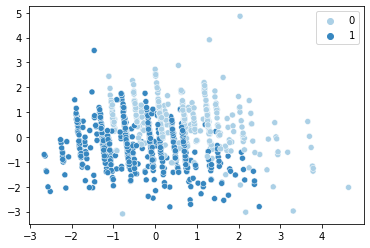

In [ ]:
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=pred_k_means_test, palette="Blues")

Actual distribution of the data:

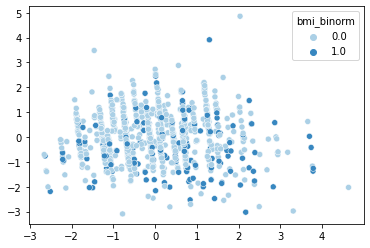

In [ ]:
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=y_test, palette="Blues")

We can see from the plots how this dataset is not suitable for unsupervised learning



---


##**Reflect on the use of Python**


---








**16.** Show examples of how you have used various Python concepts (e.g., list comprehensions, loops, conditionals, lambda functions, classes, etc.).(5p)


The data was read as a pandas data frame :
import pandas as pd   #reading and saving the file as a dataframe named kiggs

`kiggs = pd.read_spss("KiGGS03_06 (1).sav")`

Through the whole project the data was dealt with in a pandas data frame form, and sub data frames were indexed from our main data frame to create smaller data frames.


In converting the categorical data into numerical ranks, the function replace was used and implemented through providing a dictionary matching the ranks to the categories. 

```
new_kiggs_plot["freq_play_outside"] = new_kiggs_plot["freq_play_outside"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
```



---
##**17.** Show examples of how you used various Python data types (e.g., list, set, tuple, dict, np array, pd series/df). Why was it necessary to use them?(5p)


---



In the first part of our project solutions which is Data Understanding the use of concepts related to viewing the data and indexing were majorly used:


```
kiggs.head()
kiggs.shape
kiggs.info()

kiggs["age2"].value_counts(sort=False)

```



Use of indexing:

```
 
new_kiggs = kiggs[["sex","agegrp","e0621","e0622","e0623","bmiB","GLYCX","HbA1c"]]
```



In the preprocessing and statistics,  the data was further indexed and cleaned to prepare it. 

Indexing based on a boolean condition 
```
age_very_small = new_kiggs[new_kiggs["age"] == "0 - 2 Jahre"]
```


The concept of conditionals were abundant for example it was used in the definition of a function: 

```
def bmi_binorm1(row):
  if row["BMI"] >= 17:
    return 1
  elif row["BMI"] < 17:
    return 0
  return np.nan

```



Dealing with missing values through the drop of NA values :
new_kiggs.dropna()


In the machine learning section:

It was important to convert the data to numerical this was done through the replay function:

```
age_small["freq_play_outside"] = age_small["freq_play_outside"].replace({"Fast jeden Tag":1, "3-5 mal pro Woche":2, "1-2 mal pro Woche":3, "Seltener": 4, "Nie": 5})
```



